# NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from wordcloud import WordCloud as WC
#from PIL import Image#for mask on wordcloud
%matplotlib inline
from re import split

# METHOD 1:INITIALISATION OF DATA init()

In [2]:
def init():
    global df
    main_df = pd.read_excel('C:/Users/Asus/test/CLEANED_ONLINE_RETAIL.xlsx')#insert file path
    df=copy.deepcopy(main_df)

# METHOD 2:GENERATE WORDCLOUD generate_wordcloud()

In [3]:
def generate_wordcloud():
    #selection of data tuples greater than median on total amoungt purchased start#
    total_purchase=df[['StockCode','Quantity']]
    total_purchase=total_purchase.groupby('StockCode')
    total_purchase=total_purchase.sum()
    total_purchase=total_purchase.sort_values(by='Quantity',ascending=False)
    total_purchase=total_purchase[total_purchase.Quantity > total_purchase['Quantity'].median()]
    #selection of data tuples greater than median on total amoungt purchased end#
    items=df[['StockCode','Description']].merge(total_purchase,on='StockCode',how='inner')
    items=items[['StockCode','Description']]
    test=items.groupby('StockCode')
    count=test.count()
    count.sort_values(by='Description',ascending=False,inplace=True)
    count=count[count['Description']>=float(count.quantile(q=0.5))]#selecting 50th quantile and greater
    count=items['Description'].astype(str)
    string=''# adding all description to a string
    for val in df['Description']:
        if (val=='NAN' or val=='NaN' or val==np.NaN) != 1:
            string+=val+' '
    #mask=np.array(Image.open('C:/Users/user/Desktop/DS/supermarket/4.jpg'))
    wordcloud=WC(width=800,height=800, background_color='white',scale=1).generate(string)#generation of wordcloud
    plt.figure(figsize=(10,10),facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# CALLING METHODS

In [4]:
init()

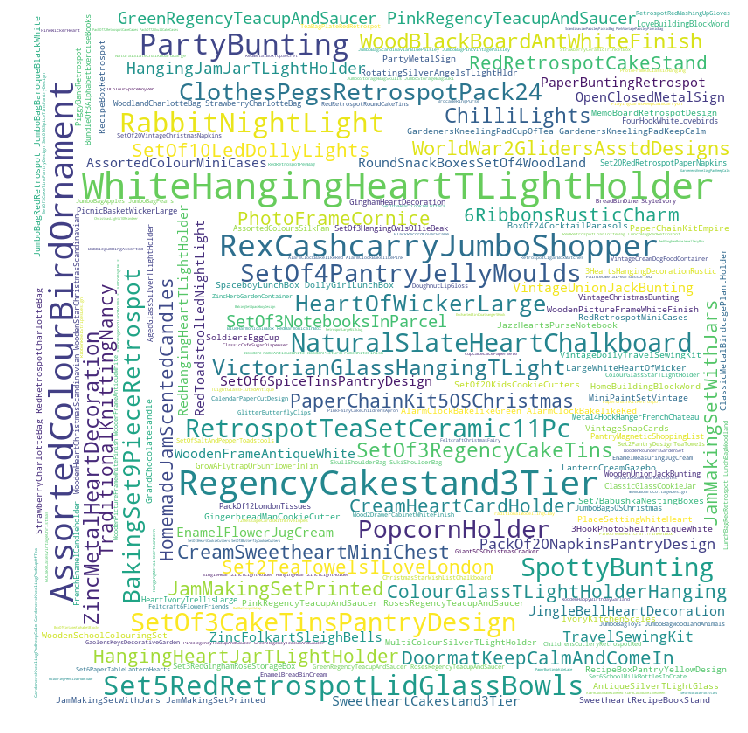

In [5]:
generate_wordcloud()